# Translation Workflow

### Background

Initially this app was made to translate worship lyrics and general text from one source language into another. It goes through 6 phases for a given prompt.

1. **Analysis**: It analyzes theological concepts, metaphors, and (for songs) syllable stress patterns.
2. **Literal Translation**: It generates a word-for-word translation.
3. **Clarity**: Refines the literal translation.
4. **Back-translation**: It translates the result so far back to the source language and shows it side-by-side with the input text.
5. **Review**: It generates a review of the translation.
6. **Final Translation**: It generates a final translation based on the review.

In the original project, the developer configured the web app to also translate lyrics--for the sake of time I ended up removing that functionality and solely focused on pure language translation.

### Goal

The goal then was to evaluate the workflow implemented by [`kcarnold`](https://github.com/kcarnold) for the [`translation-workflow`](https://translation-workflow-fzmniwjh22kqnemmwdy2yz.streamlit.app/) project. I ended up narrowing my focus to the **Review** phase of the workflow. Which brings up the question, how would I evaluate the review particularly how could I tell if the model was hallucinating. Three big ideas stood out:

1. Typographic Error
2. Missing tokens
3. Non-existent or Inappropriate Source/Target Language

The test cases are mixture of the following questions:

- What if the end/start language doesn't exist
- What if the end/start language isn't a language
- What if the data is missing

## Evaluation

#### Case: (Made-up Language) -- Target Language

For this case I utilized `Solresol`--a "musical language" created by François Sudre that uses *solfege* to depict text.

- **Prompt**: "For God so lved he porld"
- **Translation**: *Dore-fa-sol mi-sol-do re sol-re-mi*

LLMs Review

>Overall Assessment: The translation is highly problematic. It appears to be a nonsensical string of musical notes with repetitive patterns. It fails to convey the meaning of the original English phrase "For God so loved the world." There's no preservation of theological concepts, and because it's essentially gibberish, cultural appropriateness is irrelevant. The entire translation needs to be reworked.

With the end language being virtually nonsense, the model deemed it fit to deem that there were no **strengths** to this translation. It did however, try to make the best of it by suggesting a hypothetical situation where each word did correspond to a **solfege**. To which it then provided a modified solution. I've included a snapshot of it.

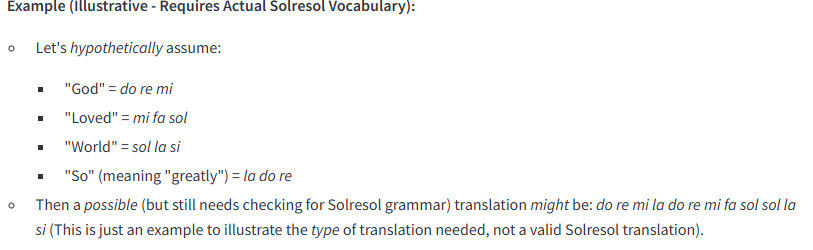

#### Case: (Made-up Language) -- Source Language

I changed the source language to be `Solresol` and the `English`. And using the same prompt translation from above, the model was surprisingly gave a translation. However, the Review noted that the translation was: **in complete absence of a meaningful translation into English.**

#### Case: (Missing Text)

- **Prompt**: "This is ___ not that we first __ but that while we were still sinners, Christ died for __"
- **Source**: English
- **Target**: German
- **Translation**: "Dies ist Liebe, nicht dass wir zuerst geliebt haben, sondern dass Christus, als wir noch Sünder waren, für uns starb."



Observations

- Removing 3 words from the original phrase: The model was able to fill in the blanks and even give recommendations.
- Removing 5 words from the original phrase: The model was able to fill in the blanks and even give recommendations.
- Removing half of the words resulted in the model hallucinating the rest. 


### Discussion (from Gemini AI)

The findings suggest that while the model exhibits some ability to identify problematic translations, particularly when the source language is invalid, it struggles with:

-Invalid Target Languages: The model's attempt to interpret non-existent target languages, rather than flagging them as errors, is a concern.

-Incomplete Input: The model's tendency to hallucinate in the presence of significant missing text poses a risk to translation accuracy and reliability.

### Recommendations (from Gemini AI)

To address these issues and improve the translation workflow, the following steps are recommended:

1. Enhance Hallucination Detection:

- Implement a more robust language identification module to prevent the model from attempting to translate to or from non-existent languages.

- Develop a scoring mechanism that quantifies the semantic coherence of the translated text, enabling the system to automatically flag potentially hallucinated content.

- Incorporate training data that includes a wider range of "non-languages" and corrupted input to improve the model's ability to discern valid from invalid language data.

2. Improve Handling of Missing Text:

- Establish a threshold for the maximum allowable amount of missing text in the input. Translations exceeding this threshold should be aborted or flagged for mandatory human review.

- Explore contextual inference and paraphrasing techniques to improve the model's ability to handle gaps in the input text, while minimizing hallucination.

- Develop methods to explicitly identify and mark any inserted text within the translation output, clearly distinguishing it from the content directly derived from the source.

3. Refine Review Phase:

- Implement more granular review criteria, including specific checks for semantic accuracy, logical consistency, and completeness.

- Develop automated review tools capable of detecting potential hallucinations, mistranslations, and omissions.

- Integrate human review as a standard component of the workflow, particularly for translations with low model confidence or those involving critical content.

4. Expand Testing:

- Conduct further testing using a more diverse set of language pairs.

- Evaluate model performance across various text genres, including technical documentation and creative writing.

- Assess the impact of noisy or poorly formatted input data on translation quality.

### Conclusion (from Gemini AI)

This evaluation highlights specific areas where the translation workflow can be improved, particularly in handling invalid language inputs and incomplete source texts. By implementing the recommendations outlined above, the accuracy and reliability of the translation process can be significantly enhanced.